In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.3.1 


In [2]:
# Loading images

lena = cv2.imread('lena.bmp')

print(type(lena))
print(lena.shape)
print(lena.dtype)


<class 'numpy.ndarray'>
(512, 512, 3)
uint8


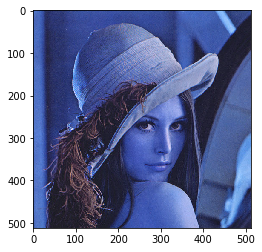

In [3]:
plt.imshow(lena)
plt.show()

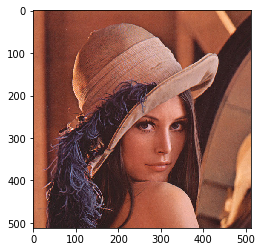

In [4]:
lena_RGB = cv2.cvtColor(lena,cv2.COLOR_BGR2RGB)

plt.imshow(lena_RGB)
plt.show()

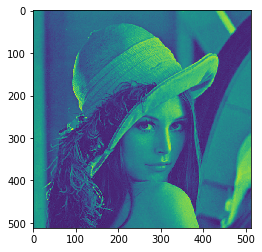

In [5]:
lena_gray = cv2.cvtColor(lena,cv2.COLOR_BGR2GRAY)

plt.imshow(lena_gray)
plt.show()

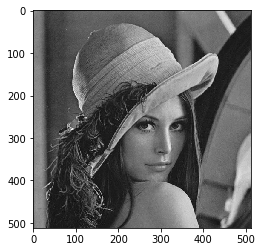

In [6]:
plt.imshow(lena_gray, cmap='gray')
plt.show()

##  Histograms

`cv2.calcHist(images, channels, mask, histSize, ranges)`

- images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.

- channels : it is also given in square brackets. It the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0],[1] or [2] to calculate histogram of blue,green or red channel respectively.

- mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. 

- histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].

- ranges : this is our RANGE. Normally, it is [0,256].

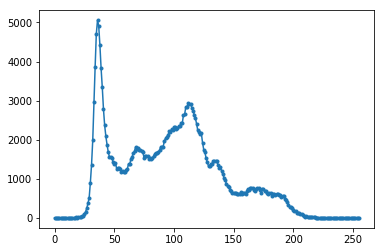

In [7]:
hist = cv2.calcHist([lena_gray],[0],None,[256],[0,256])
plt.plot(hist,'.-')
plt.show()

## Thresholding

`dst = cv2.threshold(src, thresh, maxval, type)`

- First argument is the source image, which should be a grayscale image. 

- Second argument is the threshold value which is used to classify the pixel values. 

- Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. 

OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. Different types are: 

`cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV`

Documentation clearly explain what each type is meant for. Please check out the documentation.


For example:

- cv2.THRESH_BINARY

$$  \texttt{dst} (x,y) = \left.  \begin{cases}
    \texttt{maxval}, & \text{if } \texttt{src}(x,y)> \texttt{thresh} \\
    0, & \text{otherwise } 
  \end{cases} \right.$$

- cv2.THRESH_TOZERO

$$  \texttt{dst} (x,y) = \left.  \begin{cases}
    \texttt{src}(x,y), & \text{if } \texttt{src}(x,y)> \texttt{thresh} \\
    0, & \text{otherwise } 
  \end{cases} \right.$$


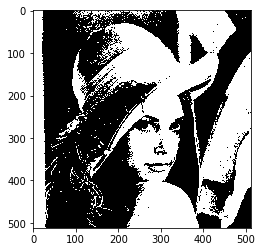

In [8]:
ret,img_th = cv2.threshold(lena_gray,100,255,cv2.THRESH_BINARY)

plt.imshow(img_th,cmap='gray')
plt.show()

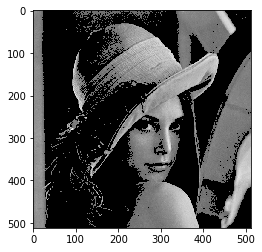

In [9]:
ret,img_th = cv2.threshold(lena_gray,100,255,cv2.THRESH_TOZERO)

plt.imshow(img_th,cmap='gray')
plt.show()


### Otsu threshold

Otsu’s algorithm tries to find a threshold value (t) which minimizes the weighted within-class variance.

132.0


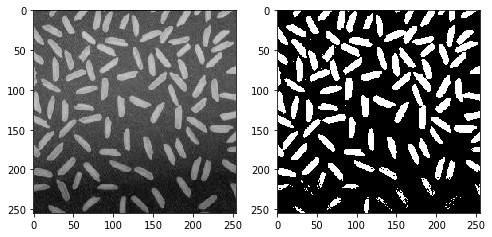

In [10]:
rice = cv2.imread('rice.jpg',0)

otsu_val,rice_otsu = cv2.threshold(rice,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

print(otsu_val)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(rice,cmap='gray')
plt.subplot(1,2,2), plt.imshow(rice_otsu,cmap='gray')
plt.show()

### Adaptive threshold

`dst = cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize)`

$$  \texttt{dst} (x,y) = \left.  \begin{cases}
    \texttt{maxval}, & \text{if } \texttt{src}(x,y)> T(x,y) \\
    0, & \text{otherwise } 
  \end{cases} \right.$$
  

The threshold value T(x,y) is a mean of the `blockSize` $\times$ `blockSize` neighborhood of (x, y) minus C 

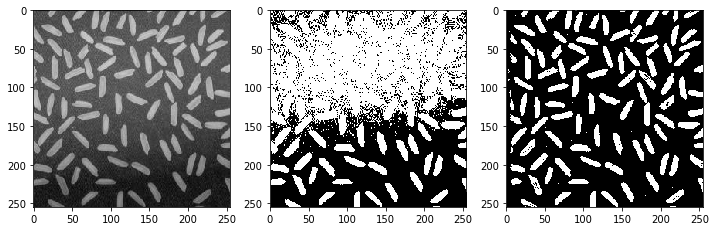

In [11]:
ret,rice_th1 = cv2.threshold(rice,100,255,cv2.THRESH_BINARY)

rice_th2 = cv2.adaptiveThreshold(rice,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY,15,-20)



plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(rice,cmap='gray')
plt.subplot(1,3,2), plt.imshow(rice_th1,cmap='gray')
plt.subplot(1,3,3), plt.imshow(rice_th2,cmap='gray')
plt.show()


## Morphological operations

Two basic morphological operators are **Erosion** and **Dilation**:

- `erosion = cv2.erode(img,kernel,iterations = 1)`
- `dilation = cv2.dilate(img,kernel,iterations = 1)`


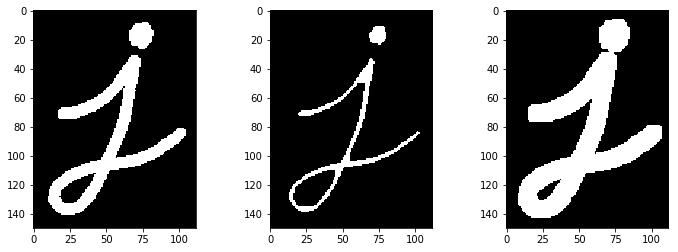

In [12]:
J_img = cv2.imread('j.png',0)

kernel = np.ones((5,5),np.uint8)

J_erode = cv2.erode(J_img,kernel,iterations = 1)
J_dilate = cv2.dilate(J_img,kernel,iterations = 1)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(J_img,cmap='gray')
plt.subplot(1,3,2), plt.imshow(J_erode,cmap='gray')
plt.subplot(1,3,3), plt.imshow(J_dilate,cmap='gray')
plt.show()

**Opening** is just another name of erosion followed by dilation. It is useful in removing noise.

`opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)`

**Closing** is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside objects.

`closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)`

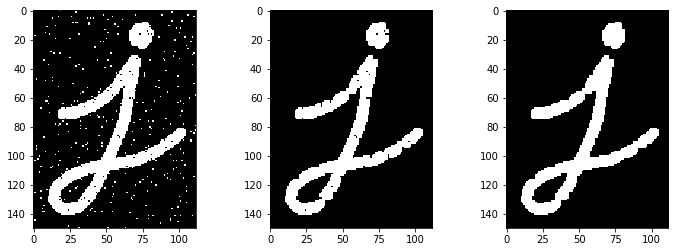

In [13]:
rnd = np.random.random(J_img.shape) < 0.02
J_noise = J_img.copy()
J_noise[rnd] = 255 - J_noise[rnd]

kernel = np.ones((3,3),np.uint8)
J_open = cv2.morphologyEx(J_noise, cv2.MORPH_OPEN, kernel)
J_close = cv2.morphologyEx(J_open, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(J_noise,cmap='gray')
plt.subplot(1,3,2), plt.imshow(J_open,cmap='gray')
plt.subplot(1,3,3), plt.imshow(J_close,cmap='gray')
plt.show()


## Connected Components Labeling

Computes the connected components labeled image of boolean image image with 4 or 8 way connectivity - returns N, the total number of labels [0, N-1] where 0 represents the background label. ltype specifies the output label image type, an important consideration based on the total number of labels or alternatively the total number of pixels in the source image.

`retval, labels = connectedComponents(image[, labels[, connectivity]]])`

Parameters:	
- image – the image to be labeled
- labels – destination labeled image
- connectivity – 8 or 4 for 8-way or 4-way connectivity respectively


30


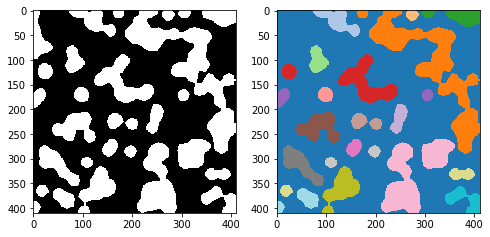

In [11]:
blobs = cv2.imread('blobs.png',0)

retval, labels = cv2.connectedComponents(blobs)

print(retval)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(blobs,cmap='gray')
plt.subplot(1,2,2), plt.imshow(labels,cmap=plt.cm.tab20)
plt.show()


## Filtering

OpenCV provides a function, `cv2.filter2D()`, to convolve a kernel with an image.

- `dst = cv2.filter2D(src, ddepth, kernel)`

- `dst = cv2.blur(src, ksize)`

- `dst = cv2.GaussianBlur(src, ksize, sigma)`

notes:
- ksize = kernel size
- ddepth: desired depth of the destination image; if it is negative, it will be the same as src.depth()
- if sigma=0 it is computed from ksize




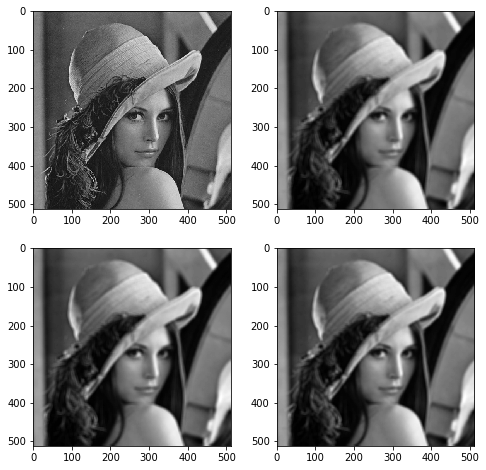

In [15]:
kernel = np.ones((9,9),np.float32)/81

lena_blur1 = cv2.filter2D(lena_gray,-1,kernel)
lena_blur2 = cv2.blur(lena_gray,(9,9)) # convolving the image with a normalized 9x9 box filter
lena_blur3 = cv2.GaussianBlur(lena_gray,(9,9),5)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1), plt.imshow(lena_gray,cmap='gray')
plt.subplot(2,2,2), plt.imshow(lena_blur1,cmap='gray')
plt.subplot(2,2,3), plt.imshow(lena_blur2,cmap='gray')
plt.subplot(2,2,4), plt.imshow(lena_blur3,cmap='gray')
plt.show()

## Gradients

`dst = cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize]]) `

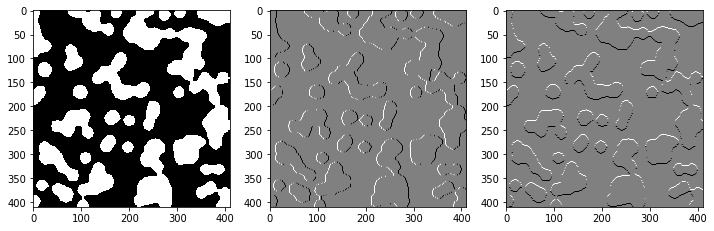

In [16]:
blobs_dx = cv2.Sobel(blobs,cv2.CV_64F,dx=1,dy=0,ksize=3)
blobs_dy = cv2.Sobel(blobs,cv2.CV_64F,dx=0,dy=1,ksize=3)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(blobs,cmap='gray')
plt.subplot(1,3,2), plt.imshow(blobs_dx,cmap='gray')
plt.subplot(1,3,3), plt.imshow(blobs_dy,cmap='gray')
plt.show()


## Canny Edge Detection

1. Noise Reduction: apply 5x5 Gaussian filter to the image.

2. Finding Intensity Gradient of the Image: using Sobel operators.

3. Non-maximum Suppression: each pixel is checked if it is a local maximum in its neighborhood in the direction of gradient.

4. Hysteresis Thresholding.


`edges = cv2.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]])`

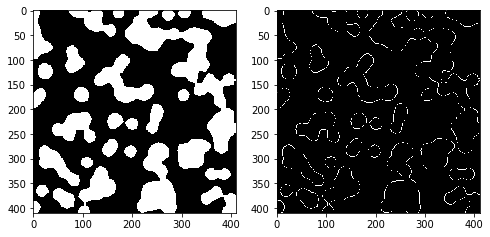

In [17]:
edges = cv2.Canny(blobs,100,200)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(blobs,cmap='gray')
plt.subplot(1,2,2), plt.imshow(edges,cmap='gray')
plt.show()


## Harris Corner Detector

OpenCV has the function `cv2.cornerHarris()` for this purpose.

The function runs the Harris edge detector on the image. For each pixel (x, y) it calculates a $2\times2$ gradient covariance matrix $M^{(x,y)}$ over a `blockSize` $\times$ `blockSize` neighborhood. Then, it computes the following characteristic:

$$\texttt{dst} (x,y) =  \mathrm{det} M - k  \cdot \left ( \mathrm{tr} M \right )^2$$

Corners in the image can be found as the local maxima of this response map.

Function arguments are :

`dst = cv2.cornerHarris(src, blockSize, ksize, k[, dst[, borderType]])`


- img - Input image, it should be grayscale and float32 type.
- blockSize - It is the size of neighbourhood considered for corner detection
- ksize - Aperture parameter of Sobel derivative used.
- k - Harris detector free parameter in the equation.

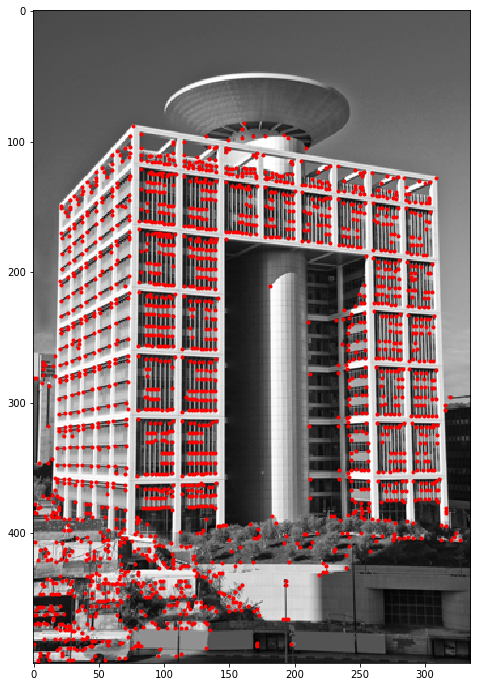

In [18]:
kiria = cv2.imread('kiria.jpg',0)
kiria_f32 = np.float32(kiria)
R = cv2.cornerHarris(kiria_f32,3,3,0.04)

kernel = np.ones((3,3))
R_dilate = cv2.dilate(R,kernel,iterations = 1)

pts = (R==R_dilate) * (R > np.percentile(R,90))
(y,x) = np.nonzero(pts)

plt.figure(figsize=(8,12))
plt.plot(x,y,'.r'), plt.imshow(kiria,cmap='gray')
plt.show()

## SIFT descriptor

Keypoint Descriptor: a 16x16 neighbourhood around the keypoint is taken. It is devided into 16 sub-blocks of 4x4 size. For each sub-block, 8 bin orientation histogram is created. So a total of 128 bin values are available. 

SIFT Detector:
`sift = cv2.xfeatures2d.SIFT_create(nfeatures = 0, sigma=1.6, edgeThreshold=10, contrastThreshold=0.04)`


- nfeatures:	The number of best features to retain. The features are ranked by their scores (measured in SIFT algorithm as the local contrast)

- contrastThreshold:	The contrast threshold used to filter out weak features in semi-uniform (low-contrast) regions. The larger the threshold, the less features are produced by the detector.

- edgeThreshold:	The threshold used to filter out edge-like features. Note that the its meaning is different from the contrastThreshold, i.e. the larger the edgeThreshold, the less features are filtered out (more features are retained).

- sigma:	The sigma of the Gaussian applied to the input image at the octave #0. If your image is captured with a weak camera with soft lenses, you might want to reduce the number.






In [19]:
g1 = cv2.imread('book.jpeg',0).T

sift = cv2.xfeatures2d.SIFT_create()

kpts = sift.detect(g1,None)

print(len(kpts))

x = [k.pt[0] for k in kpts]
y = [k.pt[1] for k in kpts]
sz = [k.size for k in kpts]
ang = [k.angle for k in kpts]



462


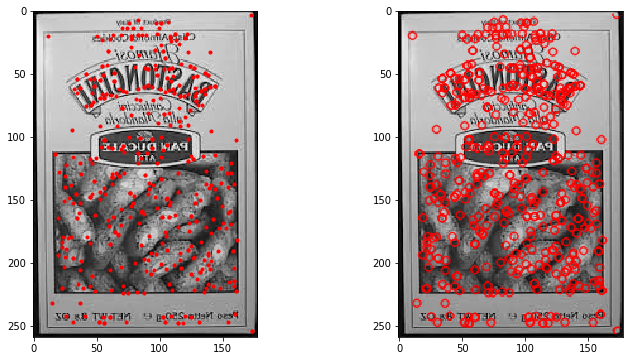

In [20]:
# draw keypoints

g1_kpts = cv2.drawKeypoints(g1, kpts, outImage=None, color=(255,0,0))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1), plt.imshow(g1, cmap='gray')
plt.plot(x,y,'.r')
plt.subplot(1,2,2), plt.imshow(g1_kpts)
plt.show()

In [2]:
# draw keypoints - details

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   flags = 0)

g1_kpts = cv2.drawKeypoints(g1, kpts, None,flags=4)

plt.figure(figsize=(8,8))
plt.imshow(g1_kpts)
plt.show()



NameError: name 'cv2' is not defined

## Feature Matching (Brute-Force)


First we have to create the BFMatcher object using `cv2.BFMatcher()`

Once it is created, two important methods are `BFMatcher.match()` and `BFMatcher.knnMatch()`. 

First one returns the best match. Second method returns k best matches where k is specified by the user. It may be useful when we need to do additional work on that.

The result of `matches = bf.match(des1,des2)`  is a list of DMatch objects. This DMatch object has following attributes:

- `DMatch.distance` - Distance between descriptors. The lower, the better it is.

- `DMatch.trainIdx` - Index of the descriptor in train descriptors

- `DMatch.queryIdx` - Index of the descriptor in query descriptors

- `DMatch.imgIdx`- Index of the train image.


Use `cv2.BFMatcher(crossCheck=True)` to return only consistent pairs.

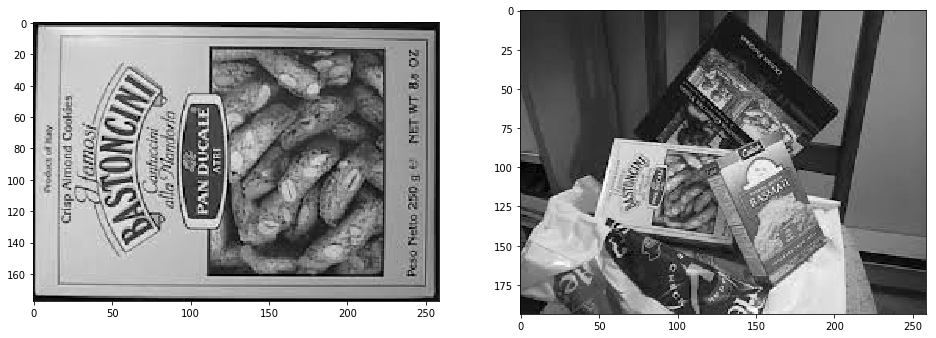

In [22]:
g1 = cv2.imread('book.jpeg',0)
g2 = cv2.imread('books.jpeg',0)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1), plt.imshow(g1,cmap='gray')
plt.subplot(1,2,2), plt.imshow(g2,cmap='gray')
plt.show()

In [23]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(g1,None)
kp2, des2 = sift.detectAndCompute(g2,None)

# create BFMatcher object
bf = cv2.BFMatcher()

# Match descriptors.
matches = bf.match(des1,des2)  

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)


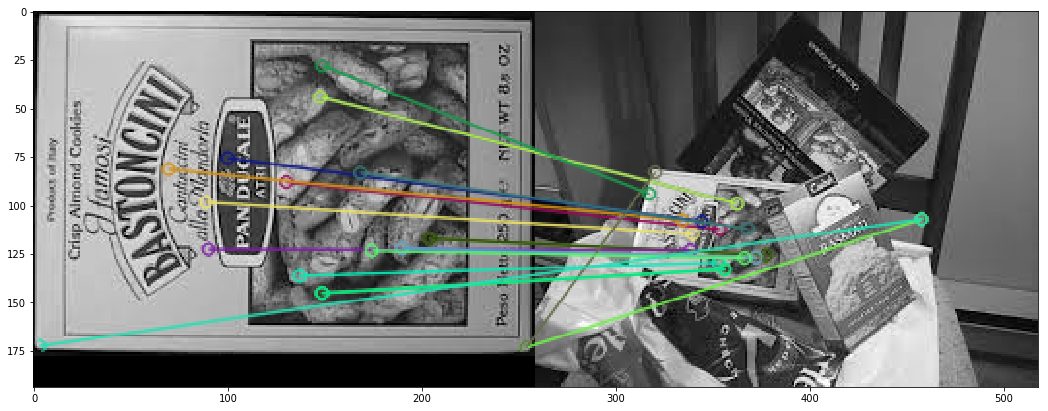

In [24]:
# Draw first 20 matches.

img3 = cv2.drawMatches(g1,kp1,g2,kp2,matches[0:20],outImg=None,
                       flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(18,12))
plt.imshow(img3)
plt.show()

19


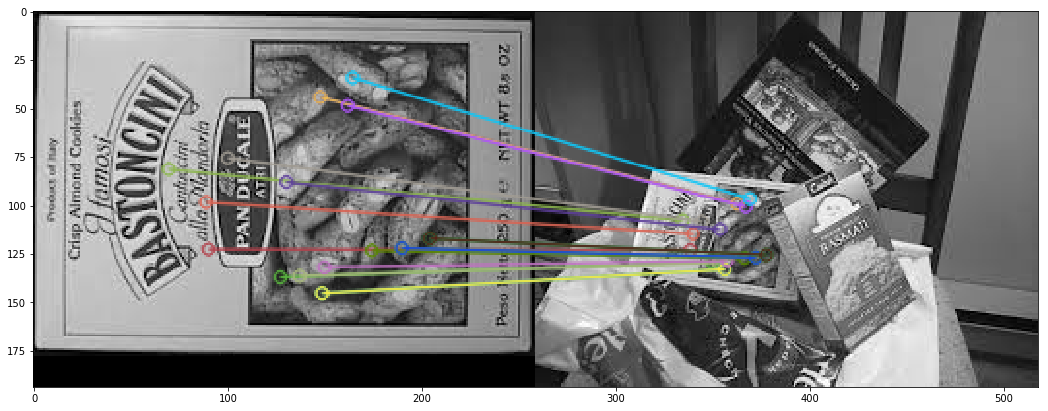

In [25]:
# Brute-Force Matching with Ratio Test

matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test (Lowe's ratio test)
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])

img3 = cv2.drawMatchesKnn(g1,kp1,g2,kp2,good,outImg=None,
                          flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)


print(len(good))

plt.figure(figsize=(18,12))

plt.imshow(img3)
plt.show()